# RED MAIN SEQUENCE (VERSION 1: Double Gaussian as Jake's method)

In [1]:
### IMPORT PACKAGES 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from  scipy import stats 
from  scipy.stats import norm
import math

from scipy.signal import argrelmin, argrelmax, argrelextrema
from sklearn import mixture


#pandas
import pandas as pd

In [2]:
### TABLE with the magnitudes values 
table = pd.read_csv('Abell2670_withz_AbsMags_Legacy.csv') # Table of Franco matched with Duho's catalogue + Legacy
print('{} objects in table'.format(len(table)))  ## Tamaño de la tabla 
print('Column names: ',table.columns) ## nombre de las columnas en una lista

387 objects in table
Column names:  Index(['Unnamed: 0', 'R_ABS', 'G_ABS'], dtype='object')


Text(0, 0.5, 'COLOR G-R')

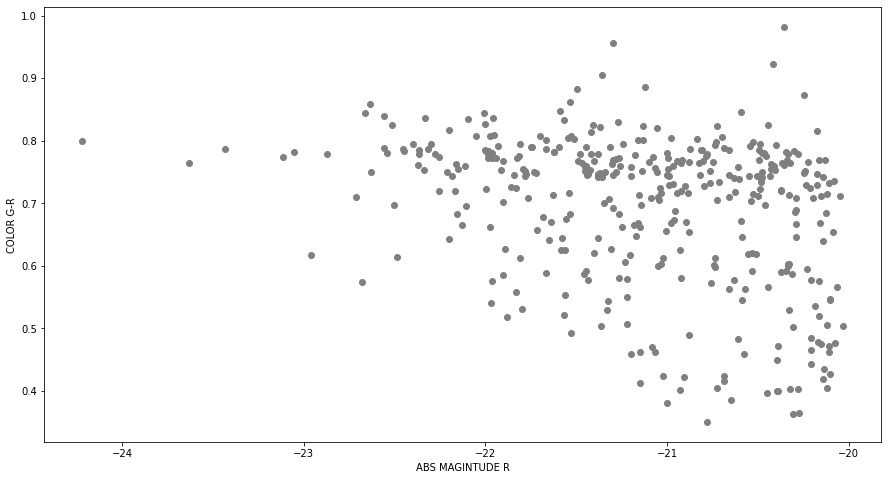

In [3]:
### Extract the columns
R = table['R_ABS'] ## Abslute magnitude in r band
G = table['G_ABS'] ## Absolute magnitude in g band
COLOR = G-R
plt.figure(figsize=(15,8))
plt.scatter(R,COLOR,color='gray')
plt.xlabel('ABS MAGINTUDE R')
plt.ylabel('COLOR G-R')

In [4]:
## Define the bins from imagN to fmagN
imag1, fmag1 = -20., -21.   ## Bin 1
imag2, fmag2 = -21., -22.   ## Bin 2
imag3, fmag3 = -22., -23.   ## Bin 3
imag4, fmag4 = -23., -24.5  ## Bin 4

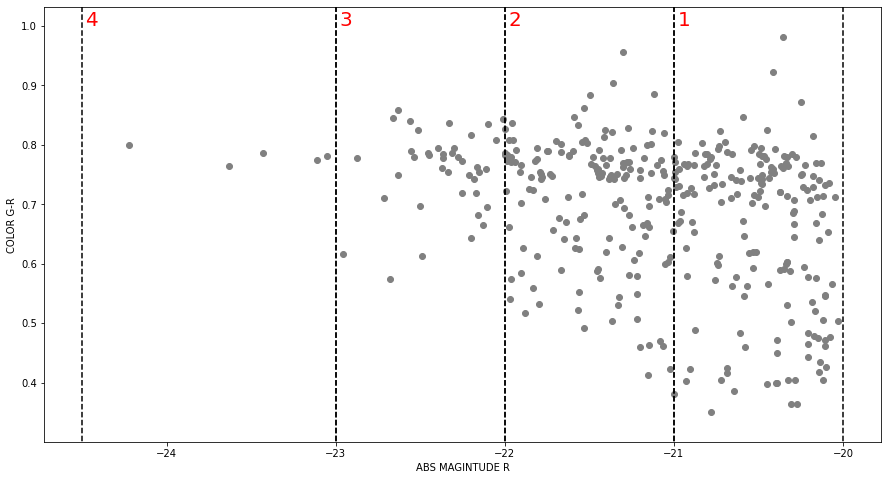

In [5]:
### Looking for four bins

plt.figure(figsize=(15,8))
plt.scatter(R,COLOR,color='gray')


## Bin 1
plt.plot(imag1+np.zeros(40),np.linspace(0.0,np.max(COLOR)+0.05,40),'--',color='black')
plt.plot(fmag1+np.zeros(40),np.linspace(0.0,np.max(COLOR)+0.05,40),'--',color='black')
plt.text(fmag1+0.02,1.,"1", fontsize=20, color='red')
#Save the magnitudes into this bin
R_bin1, G_bin1 = R[(R>=fmag1) & (R<=imag1)], G[(R>=fmag1) & (R<=imag1)]

## Bin 2
plt.plot(imag2+np.zeros(40),np.linspace(0.0,np.max(COLOR)+0.05,40),'--',color='black')
plt.plot(fmag2+np.zeros(40),np.linspace(0.0,np.max(COLOR)+0.05,40),'--',color='black')
plt.text(fmag2+0.02,1.,"2", fontsize=20, color='red')
#Save the magnitudes into this bin
R_bin2, G_bin2 = R[(R>=fmag2) & (R<imag2)], G[(R>=fmag2) & (R<imag2)]

## Bin 3
plt.plot(imag3+np.zeros(40),np.linspace(0.0,np.max(COLOR)+0.05,40),'--',color='black')
plt.plot(fmag3+np.zeros(40),np.linspace(0.0,np.max(COLOR)+0.05,40),'--',color='black')
plt.text(fmag3+0.02,1.,"3", fontsize=20, color='red')
#Save the magnitudes into this bin
R_bin3, G_bin3 = R[(R>=fmag3) & (R<imag3)], G[(R>=fmag3) & (R<imag3)]

## Bin 4
plt.plot(imag4+np.zeros(40),np.linspace(0.0,np.max(COLOR)+0.05,40),'--',color='black')
plt.plot(fmag4+np.zeros(40),np.linspace(0.0,np.max(COLOR)+0.05,40),'--',color='black')
plt.text(fmag4+0.02,1.,"4",fontsize=20, color='red')
#Save the magnitudes into this bin
R_bin4, G_bin4 = R[(R>=fmag4) & (R<imag4)], G[(R>=fmag4) & (R<imag4)]


plt.ylim(np.min(COLOR)-0.05,np.max(COLOR)+0.05)
plt.xlabel('ABS MAGINTUDE R')
plt.ylabel('COLOR G-R')
plt.show()

### NOW WE LOOK FOR THE BEST FIT IN EACH BIN

### BIN 1

For the reddest gaussian peak -->  color:  0.748748    r band: -20.247284 
For the bluest gaussian peak -- >  color: 0.505134    r band: -20.119362 
For the intersection between both gaussians -->  color: 0.639202    r band: -20.143408 


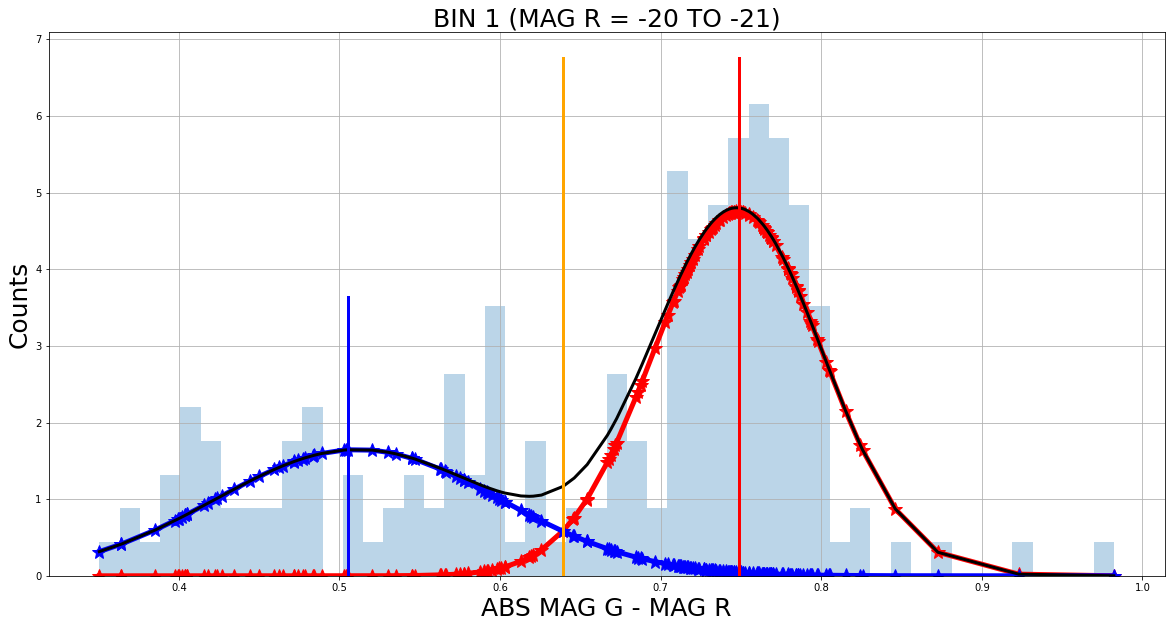

In [6]:
plt.figure(figsize=(20,10))

### The function need a random state value (a int number from 0 to INF)
### If there are few data, maybe if you change the value the function will fit in a different way.
random_state1 = 0 ### Test it until you think is a good fit. I usually use 0
n_components1 = 2 ### We fit a gaussian with 2 components


#### BIN 1
samples1 = np.array(G_bin1 - R_bin1) ## Color distribtuion for bin 1
f1 = np.ravel(samples1).astype(float) ## Return a contiguous flattened array, being all of them float numbers
f1=f1.reshape(-1,1) ## Sort the data
g1 = mixture.GaussianMixture(n_components=n_components1,covariance_type='full',random_state=random_state1).fit(f1) ## We fit a gaussian with 2 components 
weights1, means1, covars1 = g1.weights_, g1.means_, g1.covariances_  ## Save the stadistics

plt.hist(f1, bins=50, histtype='bar', density=True, alpha=0.3) ## Histogram using the sorted and flattened data

f_axis1 = f1.copy().ravel()  ## We do a copy of the data 
f_axis1.sort() ## We need to sort again since the valus should coincide with the histogram data
y1_0 = weights1[0]*stats.norm.pdf(f_axis1,means1[0],np.sqrt(covars1[0])).ravel() ## First component found by GaussianMixture
y1_1 = weights1[1]*stats.norm.pdf(f_axis1,means1[1],np.sqrt(covars1[1])).ravel() ## Second component found by GaussianMixture

### To find both peaks
max_y10 = np.where(y1_0 == np.max(y1_0))[0][0]
max_y11 = np.where(y1_1 == np.max(y1_1))[0][0]
gauss1_peak1 = f_axis1[max_y10] ## The peak of the first component
gauss2_peak1 = f_axis1[max_y11] ## The peak for the second component


### To find the intersect between both gaussians
if gauss1_peak1 > gauss2_peak1:    
    red_peak1 = gauss1_peak1
    blue_peak1 = gauss2_peak1
    
    ### Stadistics
    weights1_red, means1_red, covars1_red = weights1[0], means1[0], covars1[0]
        
    
    ### Intersect point    
    f_axis1_filter = f_axis1[(f_axis1>blue_peak1) & (f_axis1<red_peak1)] ### X data between two peaks
    y1_0_filter = y1_0[(f_axis1>blue_peak1) & (f_axis1<red_peak1)]  ### Y data for the reddest gaussian between two peaks
    y1_1_filter = y1_1[(f_axis1>blue_peak1) & (f_axis1<red_peak1)]   ### Y data for the  bluest gaussian between two peaks
    diff_values = y1_0_filter - y1_1_filter ### Calculate the difference between each y point
    min_value = np.min(abs(diff_values)) ## min value between the nearest y points
    inter_point1 = f_axis1_filter[abs(diff_values) == min_value] ### intersect point
    
     
    ### r band value
    s = samples1[samples1.argsort()]
    id_rband1_red = np.where(s==red_peak1)[0][0]
    id_rband1_blue = np.where(s==blue_peak1)[0][0]
    id_rband1_inters = np.where(s==inter_point1)[0][0]
    
    r = np.array(R_bin1)[samples1.argsort()]
    r_band1_rpeak = r[id_rband1_red] ## r band value for color peak of the reddest gaussian 
    r_band1_bpeak = r[id_rband1_blue] ## r band value for color peak of the bluest gaussian
    r_band_inters1 = r[id_rband1_inters] ## r band value for color point in the intersect point
    

    ### We plot both components
    plt.plot(f_axis1,y1_0, c='red',lw=5)
    plt.plot(f_axis1,y1_0, c='red',marker='*',markersize=15)
    plt.plot(f_axis1,y1_1, c='blue',lw=5)
    plt.plot(f_axis1,y1_1, c='blue',marker='*',markersize=15)
    plt.plot(f_axis1,y1_0+y1_1,c='black',lw=3)
        
    ### We plot three points 
    plt.plot(red_peak1+np.zeros(40),np.linspace(0.0,np.max(y1_0)+2,40),'-',color='red',lw=3)
    plt.plot(blue_peak1+np.zeros(40),np.linspace(0.0,np.max(y1_1)+2,40),'-',color='blue',lw=3)
    plt.plot(inter_point1+np.zeros(40),np.linspace(0.0,np.max(y1_0)+2,40),'-',color='orange',lw=3)

    ### print results
    print("For the reddest gaussian peak -->  color:  %f    r band: %f " % (red_peak1,r_band1_rpeak))
    print("For the bluest gaussian peak -- >  color: %f    r band: %f " % (blue_peak1,r_band1_bpeak))
    print("For the intersection between both gaussians -->  color: %f    r band: %f " % (inter_point1,r_band_inters1))


elif gauss1_peak1 < gauss2_peak1:    
    red_peak1 = gauss2_peak1
    blue_peak1 = gauss1_peak1
    
    ### Stadistics
    weights1_red, means1_red, covars1_red = weights1[1], means1[1], covars1[1]
        
    
    ### Intersect point    
    f_axis1_filter = f_axis1[(f_axis1>blue_peak1) & (f_axis1<red_peak1)] ### X data between two peaks
    y1_0_filter = y1_0[(f_axis1>blue_peak1) & (f_axis1<red_peak1)]  ### Y data for the reddest gaussian between two peaks
    y1_1_filter = y1_1[(f_axis1>blue_peak1) & (f_axis1<red_peak1)]   ### Y data for the  bluest gaussian between two peaks
    diff_values = y1_0_filter - y1_1_filter ### Calculate the difference between each y point
    min_value = np.min(abs(diff_values)) ## min value between the nearest y points
    inter_point1 = f_axis1_filter[abs(diff_values) == min_value] ### intersect point
    
     
    ### r band value
    s = samples1[samples1.argsort()]
    id_rband1_red = np.where(s==red_peak1)[0][0]
    id_rband1_blue = np.where(s==blue_peak1)[0][0]
    id_rband1_inters = np.where(s==inter_point1)[0][0]
    
    r = np.array(R_bin1)[samples1.argsort()]
    r_band1_rpeak = r[id_rband1_red] ## r band value for color peak of the reddest gaussian 
    r_band1_bpeak = r[id_rband1_blue] ## r band value for color peak of the bluest gaussian
    r_band_inters1 = r[id_rband1_inters] ## r band value for color point in the intersect point
    

    ### We plot both components
    plt.plot(f_axis1,y1_1, c='red',lw=5)
    plt.plot(f_axis1,y1_1, c='red',marker='*',markersize=15)
    plt.plot(f_axis1,y1_0, c='blue',lw=5)
    plt.plot(f_axis1,y1_0, c='blue',marker='*',markersize=15)
    plt.plot(f_axis1,y1_0+y1_1,c='black',lw=3)
        
    ### We plot three points 
    plt.plot(red_peak1+np.zeros(40),np.linspace(0.0,np.max(y1_1)+2,40),'-',color='red',lw=3)
    plt.plot(blue_peak1+np.zeros(40),np.linspace(0.0,np.max(y1_0)+2,40),'-',color='blue',lw=3)
    plt.plot(inter_point1+np.zeros(40),np.linspace(0.0,np.max(y1_1)+2,40),'-',color='orange',lw=3)

    ### print results
    print("For the reddest gaussian peak -->  color:  %f    r band: %f " % (red_peak1,r_band1_rpeak))
    print("For the bluest gaussian peak -- >  color: %f    r band: %f " % (blue_peak1,r_band1_bpeak))
    print("For the intersection between both gaussians -->  color: %f    r band: %f " % (inter_point1,r_band_inters1))

plt.xlabel("ABS MAG G - MAG R",fontsize=25)
plt.ylabel("Counts",fontsize=25)
plt.title("BIN 1 (MAG R = -20 TO -21)",fontsize=25)
plt.grid()
#plt.show()

### BIN 2

For the reddest gaussian peak -->  color:  0.765525    r band: -21.099588 
For the bluest gaussian peak -- >  color: 0.580534    r band: -21.265246 
For the intersection between both gaussians -->  color: 0.669280    r band: -21.157422 


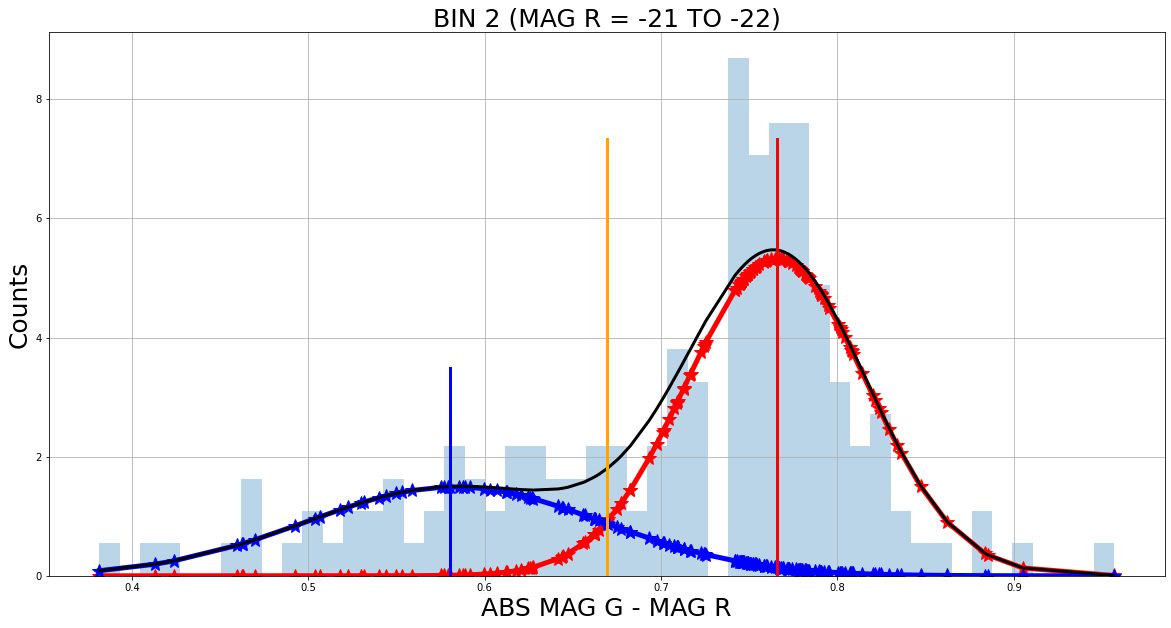

In [7]:
plt.figure(figsize=(20,10))

### The function need a random state value (a int number from 0 to INF)
### If there are few data, maybe if you change the value the function will fit in a different way.
random_state2 = 0 ### Test it until you think is a good fit. I usually use 0
n_components2 = 2 ### We fit a gaussian with 2 components


### BIN 2
samples2 = np.array(G_bin2 - R_bin2) ## Color distribtuion for bin 2
f2 = np.ravel(samples2).astype(float) ## Return a contiguous flattened array, being all of them float numbers
f2=f2.reshape(-1,1) ## Sort the data
g2 = mixture.GaussianMixture(n_components=n_components2,covariance_type='full',random_state=random_state2).fit(f2) ## We fit a gaussian with 2 components 
weights2, means2, covars2 = g2.weights_, g2.means_, g2.covariances_  ## Save the stadistics

plt.hist(f2, bins=50, histtype='bar', density=True, alpha=0.3) ## Histogram using the sorted and flattened data

f_axis2 = f2.copy().ravel()  ## We do a copy of the data 
f_axis2.sort() ## We need to sort again since the valus should coincide with the histogram data
y2_0 = weights2[0]*stats.norm.pdf(f_axis2,means2[0],np.sqrt(covars2[0])).ravel() ## First component found by GaussianMixture
y2_1 = weights2[1]*stats.norm.pdf(f_axis2,means2[1],np.sqrt(covars2[1])).ravel() ## Second component found by GaussianMixture

### To find both peaks
max_y20 = np.where(y2_0 == np.max(y2_0))[0][0]
max_y21 = np.where(y2_1 == np.max(y2_1))[0][0]
gauss1_peak2 = f_axis2[max_y20] ## The peak of the first component
gauss2_peak2 = f_axis2[max_y21] ## The peak for the second component


### To find the intersect between both gaussians
if gauss1_peak2 > gauss2_peak2:    
    red_peak2 = gauss1_peak2
    blue_peak2 = gauss2_peak2
    
    ### Stadistics
    weights2_red, means2_red, covars2_red = weights2[0], means2[0], covars2[0]
        
    
    ### Intersect point    
    f_axis2_filter = f_axis2[(f_axis2>blue_peak2) & (f_axis2<red_peak2)] ### X data between two peaks
    y2_0_filter = y2_0[(f_axis2>blue_peak2) & (f_axis2<red_peak2)]  ### Y data for the reddest gaussian between two peaks
    y2_1_filter = y2_1[(f_axis2>blue_peak2) & (f_axis2<red_peak2)]   ### Y data for the  bluest gaussian between two peaks
    diff_values = y2_0_filter - y2_1_filter ### Calculate the difference between each y point
    min_value = np.min(abs(diff_values)) ## min value between the nearest y points
    inter_point2 = f_axis2_filter[abs(diff_values) == min_value] ### intersect point
    
     
    ### r band value
    s = samples2[samples2.argsort()]
    id_rband2_red = np.where(s==red_peak2)[0][0]
    id_rband2_blue = np.where(s==blue_peak2)[0][0]
    id_rband2_inters = np.where(s==inter_point2)[0][0]
    
    r = np.array(R_bin2)[samples2.argsort()]
    r_band2_rpeak = r[id_rband2_red] ## r band value for color peak of the reddest gaussian 
    r_band2_bpeak = r[id_rband2_blue] ## r band value for color peak of the bluest gaussian
    r_band_inters2 = r[id_rband2_inters] ## r band value for color point in the intersect point
    

    ### We plot both components
    plt.plot(f_axis2,y2_0, c='red',lw=5)
    plt.plot(f_axis2,y2_0, c='red',marker='*',markersize=15)
    plt.plot(f_axis2,y2_1, c='blue',lw=5)
    plt.plot(f_axis2,y2_1, c='blue',marker='*',markersize=15)
    plt.plot(f_axis2,y2_0+y2_1,c='black',lw=3)
        
    ### We plot three points 
    plt.plot(red_peak2+np.zeros(40),np.linspace(0.0,np.max(y2_0)+2,40),'-',color='red',lw=3)
    plt.plot(blue_peak2+np.zeros(40),np.linspace(0.0,np.max(y2_1)+2,40),'-',color='blue',lw=3)
    plt.plot(inter_point2+np.zeros(40),np.linspace(0.0,np.max(y2_0)+2,40),'-',color='orange',lw=3)

    ### print results
    print("For the reddest gaussian peak -->  color:  %f    r band: %f " % (red_peak2,r_band2_rpeak))
    print("For the bluest gaussian peak -- >  color: %f    r band: %f " % (blue_peak2,r_band2_bpeak))
    print("For the intersection between both gaussians -->  color: %f    r band: %f " % (inter_point2,r_band_inters2))

elif gauss1_peak2 < gauss2_peak2:    
    red_peak2 = gauss2_peak2
    blue_peak2 = gauss1_peak2
    
    ### Stadistics
    weights2_red, means2_red, covars2_red = weights2[1], means2[1], covars2[1]
        
    
    ### Intersect point    
    f_axis2_filter = f_axis2[(f_axis2>blue_peak2) & (f_axis2<red_peak2)] ### X data between two peaks
    y2_0_filter = y2_0[(f_axis2>blue_peak2) & (f_axis2<red_peak2)]  ### Y data for the reddest gaussian between two peaks
    y2_1_filter = y2_1[(f_axis2>blue_peak2) & (f_axis2<red_peak2)]   ### Y data for the  bluest gaussian between two peaks
    diff_values = y2_0_filter - y2_1_filter ### Calculate the difference between each y point
    min_value = np.min(abs(diff_values)) ## min value between the nearest y points
    inter_point2 = f_axis2_filter[abs(diff_values) == min_value] ### intersect point
    
    ### r band value
    s = samples2[samples2.argsort()]
    id_rband2_red = np.where(s==red_peak2)[0][0]
    id_rband2_blue = np.where(s==blue_peak2)[0][0]
    id_rband2_inters = np.where(s==inter_point2)[0][0]
    
    r = np.array(R_bin2)[samples2.argsort()]
    r_band2_rpeak = r[id_rband2_red] ## r band value for color peak of the reddest gaussian 
    r_band2_bpeak = r[id_rband2_blue] ## r band value for color peak of the bluest gaussian
    r_band_inters2 = r[id_rband2_inters] ## r band value for color point in the intersect point
    

    ### We plot both components
    plt.plot(f_axis2,y2_1, c='red',lw=5)
    plt.plot(f_axis2,y2_1, c='red',marker='*',markersize=15)
    plt.plot(f_axis2,y2_0, c='blue',lw=5)
    plt.plot(f_axis2,y2_0, c='blue',marker='*',markersize=15)
    plt.plot(f_axis2,y2_0+y2_1,c='black',lw=3)
        
    ### We plot three points 
    plt.plot(red_peak2+np.zeros(40),np.linspace(0.0,np.max(y2_1)+2,40),'-',color='red',lw=3)
    plt.plot(blue_peak2+np.zeros(40),np.linspace(0.0,np.max(y2_0)+2,40),'-',color='blue',lw=3)
    plt.plot(inter_point2+np.zeros(40),np.linspace(0.0,np.max(y2_1)+2,40),'-',color='orange',lw=3)

    ### print results
    print("For the reddest gaussian peak -->  color:  %f    r band: %f " % (red_peak2,r_band2_rpeak))
    print("For the bluest gaussian peak -- >  color: %f    r band: %f " % (blue_peak2,r_band2_bpeak))
    print("For the intersection between both gaussians -->  color: %f    r band: %f " % (inter_point2,r_band_inters2))


plt.xlabel("ABS MAG G - MAG R",fontsize=25)
plt.ylabel("Counts",fontsize=25)
plt.title("BIN 2 (MAG R = -21 TO -22)",fontsize=25)
plt.grid()
#plt.show()

### BIN 3

For the reddest gaussian peak -->  color:  0.788948    r band: -22.556832 
For the bluest gaussian peak -- >  color: 0.665381    r band: -22.126487 
For the intersection between both gaussians -->  color: 0.719069    r band: -22.169687 


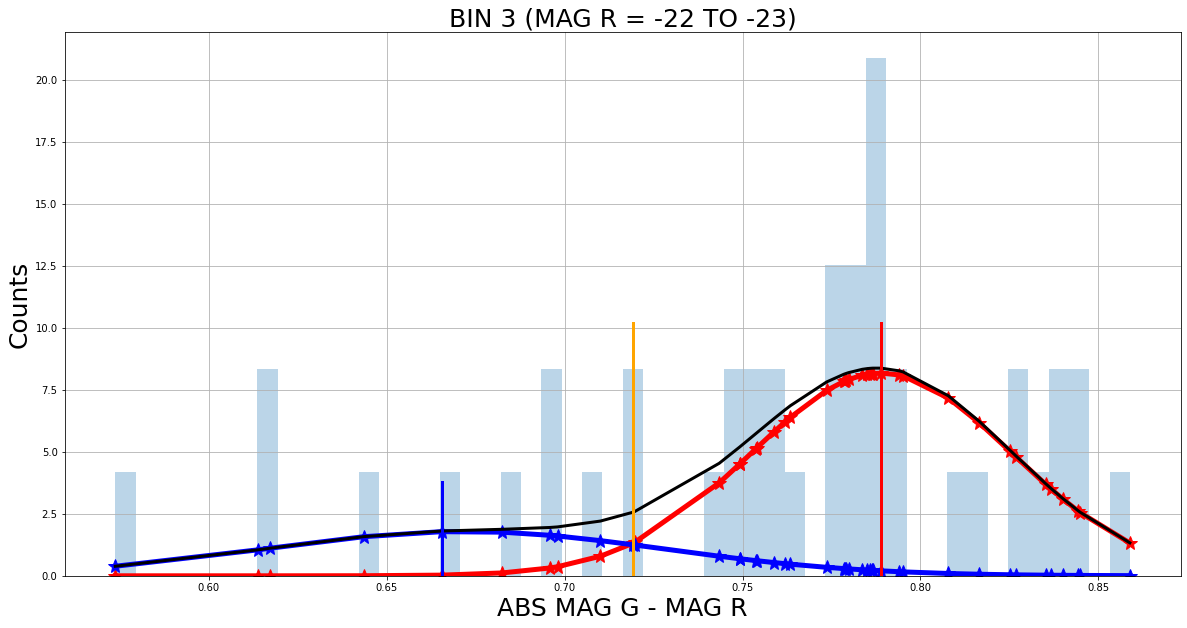

In [8]:
plt.figure(figsize=(20,10))

### The function need a random state value (a int number from 0 to INF)
### If there are few data, maybe if you change the value the function will fit in a different way.
random_state3 = 0 ### Test it until you think is a good fit. I usually use 0
n_components3 = 2 ### We fit a gaussian with 2 components


### BIN 3
samples3 = np.array(G_bin3 - R_bin3) ## Color distribtuion for bin 3
f3 = np.ravel(samples3).astype(float) ## Return a contiguous flattened array, being all of them float numbers
f3=f3.reshape(-1,1) ## Sort the data
g3 = mixture.GaussianMixture(n_components=n_components3,covariance_type='full',random_state=random_state3).fit(f3) ## We fit a gaussian with 2 components 
weights3, means3, covars3 = g3.weights_, g3.means_, g3.covariances_  ## Save the stadistics

plt.hist(f3, bins=50, histtype='bar', density=True, alpha=0.3) ## Histogram using the sorted and flattened data

f_axis3 = f3.copy().ravel()  ## We do a copy of the data 
f_axis3.sort() ## We need to sort again since the valus should coincide with the histogram data
y3_0 = weights3[0]*stats.norm.pdf(f_axis3,means3[0],np.sqrt(covars3[0])).ravel() ## First component found by GaussianMixture
y3_1 = weights3[1]*stats.norm.pdf(f_axis3,means3[1],np.sqrt(covars3[1])).ravel() ## Second component found by GaussianMixture

### To find both peaks
max_y30 = np.where(y3_0 == np.max(y3_0))[0][0]
max_y31 = np.where(y3_1 == np.max(y3_1))[0][0]
gauss1_peak3 = f_axis3[max_y30] ## The peak of the first component
gauss2_peak3 = f_axis3[max_y31] ## The peak for the second component


### To find the intersect between both gaussians
if gauss1_peak3 > gauss2_peak3:    
    red_peak3 = gauss1_peak3
    blue_peak3 = gauss2_peak3
    
    ### Stadistics
    weights3_red, means3_red, covars3_red = weights3[0], means3[0], covars3[0]
        
    
    ### Intersect point
    f_axis3_filter = f_axis3[(f_axis3>blue_peak3) & (f_axis3<red_peak3)] ### X data between two peaks
    y3_0_filter = y3_0[(f_axis3>blue_peak3) & (f_axis3<red_peak3)]  ### Y data for the reddest gaussian between two peaks
    y3_1_filter = y3_1[(f_axis3>blue_peak3) & (f_axis3<red_peak3)]   ### Y data for the  bluest gaussian between two peaks
    diff_values = y3_0_filter - y3_1_filter ### Calculate the difference between each y point
    min_value = np.min(abs(diff_values)) ## min value between the nearest y points
    inter_point3 = f_axis3_filter[abs(diff_values) == min_value] ### intersect point
    
     
    ### r band value
    s = samples3[samples3.argsort()]
    id_rband3_red = np.where(s==red_peak3)[0][0]
    id_rband3_blue = np.where(s==blue_peak3)[0][0]
    id_rband3_inters = np.where(s==inter_point3)[0][0]
    
    r = np.array(R_bin3)[samples3.argsort()]
    r_band3_rpeak = r[id_rband3_red] ## r band value for color peak of the reddest gaussian 
    r_band3_bpeak = r[id_rband3_blue] ## r band value for color peak of the bluest gaussian
    r_band_inters3 = r[id_rband3_inters] ## r band value for color point in the intersect point
    

    ### We plot both components
    plt.plot(f_axis3,y3_0, c='red',lw=5)
    plt.plot(f_axis3,y3_0, c='red',marker='*',markersize=15)
    plt.plot(f_axis3,y3_1, c='blue',lw=5)
    plt.plot(f_axis3,y3_1, c='blue',marker='*',markersize=15)
    plt.plot(f_axis3,y3_0+y3_1,c='black',lw=3)
        
    ### We plot three points 
    plt.plot(red_peak3+np.zeros(40),np.linspace(0.0,np.max(y3_0)+2,40),'-',color='red',lw=3)
    plt.plot(blue_peak3+np.zeros(40),np.linspace(0.0,np.max(y3_1)+2,40),'-',color='blue',lw=3)
    plt.plot(inter_point3+np.zeros(40),np.linspace(0.0,np.max(y3_0)+2,40),'-',color='orange',lw=3)

    ### print results
    print("For the reddest gaussian peak -->  color:  %f    r band: %f " % (red_peak3,r_band3_rpeak))
    print("For the bluest gaussian peak -- >  color: %f    r band: %f " % (blue_peak3,r_band3_bpeak))
    print("For the intersection between both gaussians -->  color: %f    r band: %f " % (inter_point3,r_band_inters3))

elif gauss1_peak3 < gauss2_peak3:    
    red_peak3 = gauss2_peak3
    blue_peak3 = gauss1_peak3
    
    ### Stadistics
    weights3_red, means3_red, covars3_red = weights3[1], means3[1], covars3[1]
        
    
    ### Intersect point
    f_axis3_filter = f_axis3[(f_axis3>blue_peak3) & (f_axis3<red_peak3)] ### X data between two peaks
    y3_0_filter = y3_0[(f_axis3>blue_peak3) & (f_axis3<red_peak3)]  ### Y data for the reddest gaussian between two peaks
    y3_1_filter = y3_1[(f_axis3>blue_peak3) & (f_axis3<red_peak3)]   ### Y data for the  bluest gaussian between two peaks
    diff_values = y3_0_filter - y3_1_filter ### Calculate the difference between each y point
    min_value = np.min(abs(diff_values)) ## min value between the nearest y points
    inter_point3 = f_axis3_filter[abs(diff_values) == min_value] ### intersect point
    
    ### r band value
    s = samples3[samples3.argsort()]
    id_rband3_red = np.where(s==red_peak3)[0][0]
    id_rband3_blue = np.where(s==blue_peak3)[0][0]
    id_rband3_inters = np.where(s==inter_point3)[0][0]
    
    r = np.array(R_bin3)[samples3.argsort()]
    r_band3_rpeak = r[id_rband3_red] ## r band value for color peak of the reddest gaussian 
    r_band3_bpeak = r[id_rband3_blue] ## r band value for color peak of the bluest gaussian
    r_band_inters3 = r[id_rband3_inters] ## r band value for color point in the intersect point
    

    ### We plot both components
    plt.plot(f_axis3,y3_1, c='red',lw=5)
    plt.plot(f_axis3,y3_1, c='red',marker='*',markersize=15)
    plt.plot(f_axis3,y3_0, c='blue',lw=5)
    plt.plot(f_axis3,y3_0, c='blue',marker='*',markersize=15)
    plt.plot(f_axis3,y3_0+y3_1,c='black',lw=3)
        
    ### We plot three points 
    plt.plot(red_peak3+np.zeros(40),np.linspace(0.0,np.max(y3_1)+2,40),'-',color='red',lw=3)
    plt.plot(blue_peak3+np.zeros(40),np.linspace(0.0,np.max(y3_0)+2,40),'-',color='blue',lw=3)
    plt.plot(inter_point3+np.zeros(40),np.linspace(0.0,np.max(y3_1)+2,40),'-',color='orange',lw=3)

    ### print results
    print("For the reddest gaussian peak -->  color:  %f    r band: %f " % (red_peak3,r_band3_rpeak))
    print("For the bluest gaussian peak -- >  color: %f    r band: %f " % (blue_peak3,r_band3_bpeak))
    print("For the intersection between both gaussians -->  color: %f    r band: %f " % (inter_point3,r_band_inters3))



plt.xlabel("ABS MAG G - MAG R",fontsize=25)
plt.ylabel("Counts",fontsize=25)
plt.title("BIN 3 (MAG R = -22 TO -23)",fontsize=25)
plt.grid()
#plt.show()

### BIN 4

####   For this bin we have few point so we fit a gaussian with only one component

For the reddest gaussian peak -->  color:  0.781892    r band: -23.053423 


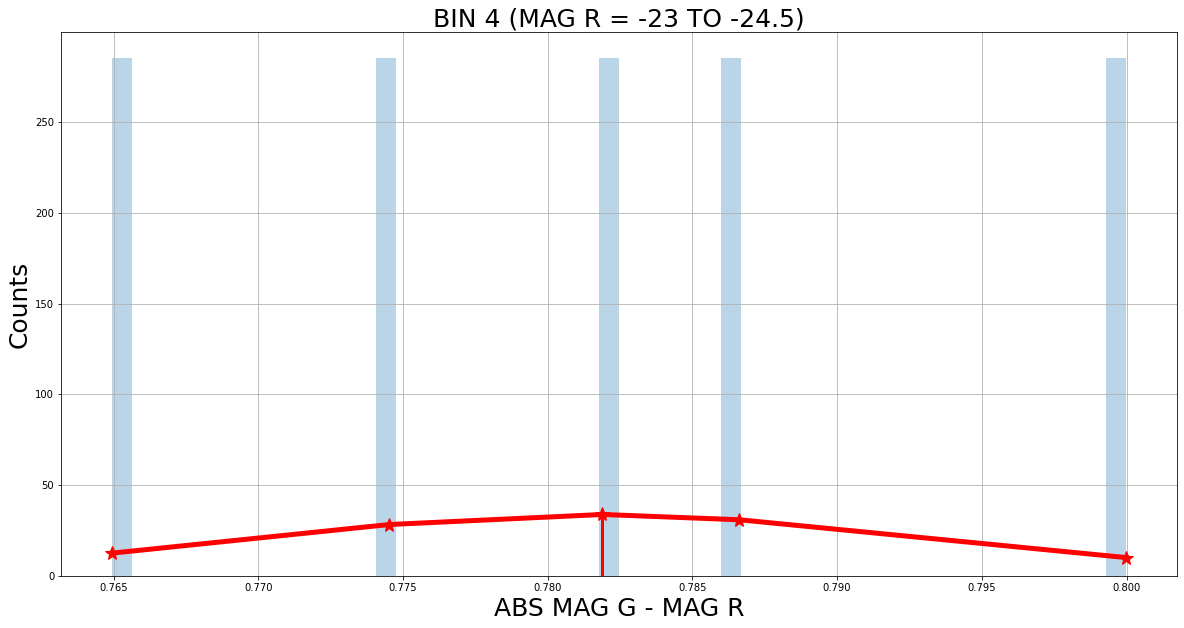

In [9]:
plt.figure(figsize=(20,10))

### The function need a random state value (a int number from 0 to INF)
### If there are few data, maybe if you change the value the function will fit in a different way.
random_state4 = 0 ### Test it until you think is a good fit. I usually use 0
n_components4 = 1 ### We fit a gaussian with 2 components


### BIN 4
samples4 = np.array(G_bin4 - R_bin4) ## Color distribtuion for bin 4
f4 = np.ravel(samples4).astype(float) ## Return a contiguous flattened array, being all of them float numbers
f4=f4.reshape(-1,1) ## Sort the data
g4 = mixture.GaussianMixture(n_components=n_components4,covariance_type='full',random_state=random_state4).fit(f4) ## We fit a gaussian with 2 components 
weights4, means4, covars4 = g4.weights_, g4.means_, g4.covariances_  ## Save the stadistics

plt.hist(f4, bins=50, histtype='bar', density=True, alpha=0.3) ## Histogram using the sorted and flattened data

f_axis4 = f4.copy().ravel()  ## We do a copy of the data 
f_axis4.sort() ## We need to sort again since the valus should coincide with the histogram data
y4_0 = weights4[0]*stats.norm.pdf(f_axis4,means4[0],np.sqrt(covars4[0])).ravel() ## First component found by GaussianMixture
#y3_1 = weights3[1]*stats.norm.pdf(f_axis3,means3[1],np.sqrt(covars3[1])).ravel() ## Second component found by GaussianMixture

### To find only one peak (we comment all about the second peak)
max_y40 = np.where(y4_0 == np.max(y4_0))[0][0]
#max_y41 = np.where(y4_1 == np.max(y4_1))[0][0]
gauss1_peak4 = f_axis4[max_y40] ## The peak of the first component
### Here we define the second peak = 0
gauss2_peak4 = 0 #gauss2_peak4 = f_axis4[max_y41] ## The peak for the second component


### To find the intersect between both gaussians
if gauss1_peak4 > gauss2_peak4:    
    red_peak4 = gauss1_peak4
    #blue_peak4 = gauss2_peak4
    
    ### Stadistics
    weights4_red, means4_red, covars4_red = weights4[0], means4[0], covars4[0]
        
    
    ### Intersect point    
    #f_axis4_filter = f_axis4[(f_axis4>blue_peak4) & (f_axis4<red_peak4)] ### X data between two peaks
    #y4_0_filter = y4_0[(f_axis4>blue_peak4) & (f_axis4<red_peak4)]  ### Y data for the reddest gaussian between two peaks
    #y4_1_filter = y4_1[(f_axis4>blue_peak4) & (f_axis4<red_peak4)]   ### Y data for the  bluest gaussian between two peaks
    #diff_values = y4_0_filter - y4_1_filter ### Calculate the difference between each y point
    #min_value = np.min(abs(diff_values)) ## min value between the nearest y points
    #inter_point4 = f_axis4_filter[abs(diff_values) == min_value] ### intersect point
    
     
    ### r band value
    s = samples4[samples4.argsort()]
    id_rband4_red = np.where(s==red_peak4)[0][0]
    #id_rband4_blue = np.where(s==blue_peak4)[0][0]
    #id_rband4_inters = np.where(s==inter_point4)[0][0]
    
    r = np.array(R_bin4)[samples4.argsort()]
    r_band4_rpeak = r[id_rband4_red] ## r band value for color peak of the reddest gaussian 
    #r_band4_bpeak = r[id_rband4_blue] ## r band value for color peak of the bluest gaussian
    #r_band_inters4 = r[id_rband4_inters] ## r band value for color point in the intersect point
    

    ### We plot both components
    plt.plot(f_axis4,y4_0, c='red',lw=5)
    plt.plot(f_axis4,y4_0, c='red',marker='*',markersize=15)
    #plt.plot(f_axis4,y4_1, c='blue',lw=5)
    #plt.plot(f_axis4,y4_1, c='blue',marker='*',markersize=15)
    #plt.plot(f_axis4,y4_0+y4_1,c='black',lw=3)
        
    ### We plot three points 
    plt.plot(red_peak4+np.zeros(40),np.linspace(0.0,np.max(y4_0)+2,40),'-',color='red',lw=3)
    #plt.plot(blue_peak4+np.zeros(40),np.linspace(0.0,np.max(y4_1)+2,40),'-',color='blue',lw=3)
    #plt.plot(inter_point4+np.zeros(40),np.linspace(0.0,np.max(y4_0)+2,40),'-',color='orange',lw=3)

    ### print results
    print("For the reddest gaussian peak -->  color:  %f    r band: %f " % (red_peak4,r_band4_rpeak))
    #print("For the bluest gaussian peak -- >  color: %f    r band: %f " % (blue_peak4,r_band4_bpeak))
    #print("For the intersection between both gaussians -->  color: %f    r band: %f " % (inter_point4,r_band_inters4))

elif gauss1_peak4 < gauss2_peak4:    
    #red_peak4 = gauss2_peak4
    blue_peak4 = gauss1_peak4
    
    ### Stadistics
    weights4_red, means4_red, covars4_red = weights4[1], means4[1], covars4[1]
        
    
    ### Intersect point  
    #f_axis4_filter = f_axis4[(f_axis4>blue_peak4) & (f_axis4<red_peak4)] ### X data between two peaks
    #y4_0_filter = y4_0[(f_axis4>blue_peak4) & (f_axis4<red_peak4)]  ### Y data for the reddest gaussian between two peaks
    #y4_1_filter = y4_1[(f_axis4>blue_peak4) & (f_axis4<red_peak4)]   ### Y data for the  bluest gaussian between two peaks
    #diff_values = y4_0_filter - y4_1_filter ### Calculate the difference between each y point
    #min_value = np.min(abs(diff_values)) ## min value between the nearest y points
    #inter_point4 = f_axis4_filter[abs(diff_values) == min_value] ### intersect point
    
    ### r band value
    s = samples4[samples4.argsort()]
    id_rband4_red = np.where(s==red_peak4)[0][0]
    #id_rband4_blue = np.where(s==blue_peak4)[0][0]
    #id_rband4_inters = np.where(s==inter_point4)[0][0]
    
    r = np.array(R_bin4)[samples4.argsort()]
    r_band4_rpeak = r[id_rband4_red] ## r band value for color peak of the reddest gaussian 
    #r_band4_bpeak = r[id_rband4_blue] ## r band value for color peak of the bluest gaussian
    #r_band_inters4 = r[id_rband4_inters] ## r band value for color point in the intersect point
    

    ### We plot both components
    #plt.plot(f_axis4,y4_1, c='red',lw=5)
    #plt.plot(f_axis4,y4_1, c='red',marker='*',markersize=15)
    plt.plot(f_axis4,y4_0, c='blue',lw=5)
    plt.plot(f_axis4,y4_0, c='blue',marker='*',markersize=15)
    #plt.plot(f_axis4,y4_0+y4_1,c='black',lw=3)
        
    ### We plot three points 
    #plt.plot(red_peak4+np.zeros(40),np.linspace(0.0,np.max(y4_1)+2,40),'-',color='red',lw=3)
    plt.plot(blue_peak4+np.zeros(40),np.linspace(0.0,np.max(y4_0)+2,40),'-',color='blue',lw=3)
    #plt.plot(inter_point4+np.zeros(40),np.linspace(0.0,np.max(y4_1)+2,40),'-',color='orange',lw=3)

    ### print results
    #print("For the reddest gaussian peak -->  color:  %f    r band: %f " % (red_peak4,r_band4_rpeak))
    print("For the bluest gaussian peak -- >  color: %f    r band: %f " % (blue_peak4,r_band4_bpeak))
    #print("For the intersection between both gaussians -->  color: %f    r band: %f " % (inter_point4,r_band_inters4))

plt.xlabel("ABS MAG G - MAG R",fontsize=25)
plt.ylabel("Counts",fontsize=25)
plt.title("BIN 4 (MAG R = -23 TO -24.5)",fontsize=25)
plt.grid()
#plt.show()

### NOW WE OBTAIN THE SLOPE AND INTERCEPT FOR THE RS LINE AND THE INTERSECT LINE

For Red Sequence slope: -0.013058    intercept: 0.487409    R-squared: 0.888341    std: 0.006547
The sigma as the mean sigma from the four red gaussian curves is  [[0.03821519]]
For Intersect slope: -0.039412    intercept: -0.157993    R-squared: 0.979961    std: 0.009762
Red dash line corresponds to +/-2*sigma above/below the rs line


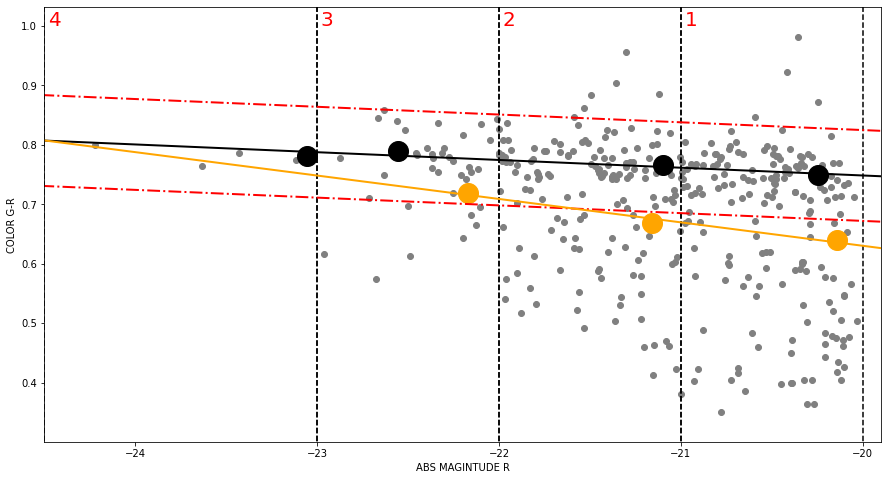

In [10]:
plt.figure(figsize=(15,8))
plt.scatter(R,COLOR,color='gray')

## Bin 1
plt.plot(imag1+np.zeros(40),np.linspace(0.0,np.max(COLOR)+0.05,40),'--',color='black')
plt.plot(fmag1+np.zeros(40),np.linspace(0.0,np.max(COLOR)+0.05,40),'--',color='black')
plt.text(fmag1+0.02,1.,"1", fontsize=20, color='red')
plt.plot(r_band1_rpeak,red_peak1,marker='o',color='black', markersize=20) ## plot the peak for the reddest gaussan
plt.plot(r_band_inters1,inter_point1,marker='o',color='orange',markersize=20) ## plot the intersect between both gaussian 

## Bin 2
plt.plot(imag2+np.zeros(40),np.linspace(0.0,np.max(COLOR)+0.05,40),'--',color='black') 
plt.plot(fmag2+np.zeros(40),np.linspace(0.0,np.max(COLOR)+0.05,40),'--',color='black') 
plt.text(fmag2+0.02,1.,"2", fontsize=20, color='red')
plt.plot(r_band2_rpeak,red_peak2,marker='o',color='black',markersize=20)  ## plot the peak for the reddest gaussan
plt.plot(r_band_inters2,inter_point2,marker='o',color='orange',markersize=20) ## plot the intersect between both gaussian 

## Bin 3
plt.plot(imag3+np.zeros(40),np.linspace(0.0,np.max(COLOR)+0.05,40),'--',color='black') 
plt.plot(fmag3+np.zeros(40),np.linspace(0.0,np.max(COLOR)+0.05,40),'--',color='black') 
plt.text(fmag3+0.02,1.,"3", fontsize=20, color='red')
plt.plot(r_band3_rpeak,red_peak3,marker='o',color='black',markersize=20) ## plot the peak for the reddest gaussan
plt.plot(r_band_inters3,inter_point3,marker='o',color='orange',markersize=20) ## plot the intersect between both gaussian 

## Bin 4
plt.plot(imag4+np.zeros(40),np.linspace(0.0,1.6,40),'--',color='black')
plt.plot(fmag4+np.zeros(40),np.linspace(0.0,1.6,40),'--',color='black')
plt.text(fmag4+0.02,1.,"4",fontsize=20, color='red')
plt.plot(r_band4_rpeak,red_peak4,marker='o',color='black',markersize=20) ## plot the peak for the reddest gaussan
#plt.plot(r_band_inters4,inter_point4,marker='o',color='orange',markersize=20)

###########################################################################################################
### Fit red squence line
x_rs = np.array([r_band1_rpeak,r_band2_rpeak,r_band3_rpeak,r_band4_rpeak]) #r_band_filter
y_rs = np.array([red_peak1,red_peak2,red_peak3,red_peak4]) #color_filter
N_rs=len(y_rs)   # con len() obtenemos la cantidad de datos de cada columna
slope_rs, intercept_rs, r_value_rs, p_value_rs, std_err_rs = stats.linregress(x_rs,y_rs)
print("For Red Sequence slope: %f    intercept: %f    R-squared: %f    std: %f" % (slope_rs,intercept_rs,r_value_rs**2,std_err_rs*np.sqrt(N_rs)))
R_rs = x_rs
G_R_rs = intercept_rs + slope_rs*R_rs

sg_rs1, sg_rs2, sg_rs3, sg_rs4 = np.sqrt(covars1_red), np.sqrt(covars2_red), np.sqrt(covars3_red), np.sqrt(covars4_red)
sigma_rs = (sg_rs1+sg_rs2+sg_rs3+sg_rs4)/4.
print('The sigma as the mean sigma from the four red gaussian curves is ', sigma_rs)

plt.plot(np.arange(-25,-18,1),intercept_rs + slope_rs*(np.arange(-25,-18,1)), 'black', lw=2)
plt.plot(np.arange(-25,-18,1),intercept_rs + slope_rs*(np.arange(-25,-18,1))-2*sigma_rs[0], 'red', ls='-.',lw=2)
#plt.plot(np.arange(-25,-18,1),intercept_rs + slope_rs*(np.arange(-25,-18,1))-8*sigma_rs[0], 'red', ls='--',lw=2)
plt.plot(np.arange(-25,-18,1),intercept_rs + slope_rs*(np.arange(-25,-18,1))+2*sigma_rs[0], 'red', ls='-.',lw=2)


###########################################################################################################
### Fit intersect line
x_sp = np.array([r_band_inters1,r_band_inters2,r_band_inters3]).flatten()#,rband_split4]).flatten() #r_band_filter
y_sp = np.array([inter_point1,inter_point2,inter_point3]).flatten()#,color_split4]).flatten() #color_filter
N_sp=len(y_sp)   # con len() obtenemos la cantidad de datos de cada columna
slope_sp, intercept_sp, r_value_sp, p_value_sp, std_err_sp = stats.linregress(x_sp,y_sp)
print("For Intersect slope: %f    intercept: %f    R-squared: %f    std: %f" % (slope_sp,intercept_sp,r_value_sp**2,std_err_sp*np.sqrt(N_sp)))
R_sp = x_sp
G_R_sp = intercept_sp + slope_sp*R_sp


plt.plot(np.arange(-25,-18,1),intercept_sp + slope_sp*(np.arange(-25,-18,1)), 'orange', lw=2)


print("Red dash line corresponds to +/-2*sigma above/below the rs line")
plt.xlim(fmag4,imag1+0.1)
plt.ylim(np.min(COLOR)-0.05,np.max(COLOR)+0.05)
plt.xlabel('ABS MAGINTUDE R')
plt.ylabel('COLOR G-R')
plt.show()